# ePSproc X-section demo
Testing X-section routines, Bemo, 13/10/19
(Following ECDS tests with Ne results and ePSproc_demo_Aug2019.ipynb)

## Basic IO

In [1]:
import sys
import os
import numpy as np

# For module testing, include path to module here
modPath = r'/home/femtolab/github/ePSproc/'
sys.path.append(modPath)
import epsproc as ep

* pyevtk not found, VTK export not available. 
* plotly not found, plotly plots not available. 


In [2]:
# Confirm available dataTypes... (varies with ePSproc version)
ep.util.dataTypesList()

{'BLM': {'source': 'epsproc.MFBLM',
  'desc': 'Calcualted MF beta parameters from epsproc.MFBLM().'},
 'matE': {'source': 'DumpIdy',
  'desc': 'Raw photoionization matrix elements from ePS, DumpIdy command and file segments.'},
 'EDCS': {'source': 'EDCS',
  'desc': 'Electron scattering DCS results from ePS, EDCS command and file segments.'},
 'XSect': {'source': 'CrossSection',
  'desc': 'Photoionziation cross section results from ePS, GetCro command and CrossSection file segments.'}}

In [3]:
# Load data from modPath\data
dataPath = os.path.join(modPath, 'data', 'photoionization')

# Scan data dir
dataSet = ep.readMatEle(fileBase = dataPath, recordType = 'CrossSection')  

*** ePSproc readMatEle(): scanning files for CrossSection segments.

*** Scanning dir
/home/femtolab/github/ePSproc/data/photoionization
Found 2 .out file(s)


*** Reading ePS output file:  /home/femtolab/github/ePSproc/data/photoionization/n2_3sg_0.1-50.1eV_A2.inp.out
Expecting 51 energy points.
Expecting 2 symmetries.
Scanning CrossSection segments.
Expecting 3 CrossSection segments.
Found 3 CrossSection segments (sets of results).
Processed 3 sets of CrossSection file segments, (0 blank)

*** Reading ePS output file:  /home/femtolab/github/ePSproc/data/photoionization/no2_demo_ePS.out
Expecting 1 energy points.
Expecting 3 symmetries.
Scanning CrossSection segments.
Expecting 4 CrossSection segments.
Found 4 CrossSection segments (sets of results).
Processed 4 sets of CrossSection file segments, (0 blank)


### Structure

Data is read and sorted into [Xarrays](http://xarray.pydata.org/en/stable/index.html), currently one Xarray per input file and data/segment type. The full dimensionality is maintained here.

Calling the array will provide some output...

In [4]:
dataSet[1]

<xarray.DataArray 'no2_demo_ePS.out' (Sym: 4, Ehv: 1, XC: 2, Type: 3)>
array([[[[-0.0097, -0.0106, -0.0117],
         [ 0.5266,  0.5076,  0.4893]]],


       [[[-0.6183, -0.6055, -0.5917],
         [ 1.7563,  1.6478,  1.5481]]],


       [[[-0.3437, -0.367 , -0.3902],
         [ 1.1654,  1.1528,  1.1506]]],


       [[[-0.5008, -0.4873, -0.4743],
         [ 3.4483,  3.3081,  3.188 ]]]])
Coordinates:
  * Ehv      (Ehv) float64 14.4
  * Type     (Type) object 'L' 'M' 'V'
  * XC       (XC) object 'BETA' 'SIGMA'
  * Sym      (Sym) MultiIndex
  - Total    (Sym) object 'A1' 'B1' 'B2' 'All'
  - Cont     (Sym) object 'A2' 'B2' 'B1' 'All'
Attributes:
    dataType:  XSect
    file:      no2_demo_ePS.out
    fileBase:  /home/femtolab/github/ePSproc/data/photoionization

... and sub-selection can provide sets of matrix elements as a function of energy, symmetry and type.

In [5]:
inds = {'Type':'L','Cont':'A2'}
dataSet[1].sel(inds).squeeze()

<xarray.DataArray 'no2_demo_ePS.out' (XC: 2)>
array([-0.0097,  0.5266])
Coordinates:
    Ehv      float64 14.4
    Type     <U1 'L'
  * XC       (XC) object 'BETA' 'SIGMA'
    Total    <U2 'A1'
Attributes:
    dataType:  XSect
    file:      no2_demo_ePS.out
    fileBase:  /home/femtolab/github/ePSproc/data/photoionization

The ```matEleSelector``` function does the same thing, and also includes thresholding on abs values:

In [6]:
# Set sq = True to squeeze on singleton dimensions
ep.matEleSelector(dataSet[1], thres=1e-2, inds = inds, sq = True)

<xarray.DataArray 'no2_demo_ePS.out' ()>
array(0.5266)
Coordinates:
    Ehv      float64 14.4
    Type     <U1 'L'
    XC       <U5 'SIGMA'
    Total    <U2 'A1'
Attributes:
    dataType:  XSect
    file:      no2_demo_ePS.out
    fileBase:  /home/femtolab/github/ePSproc/data/photoionization

## Basic plotting from Xarray

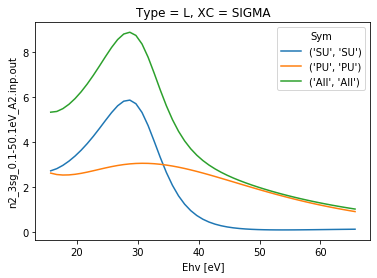

In [7]:
# Plot cross sections using Xarray functionality
daPlot = dataSet[0].sel({'Type':'L', 'XC':'SIGMA'}).squeeze()
daPlot.plot.line(x='Ehv');

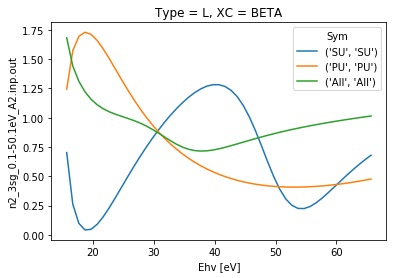

In [8]:
daPlot = dataSet[0].sel({'Type':'L', 'XC':'BETA'}).squeeze()
daPlot.plot.line(x='Ehv');

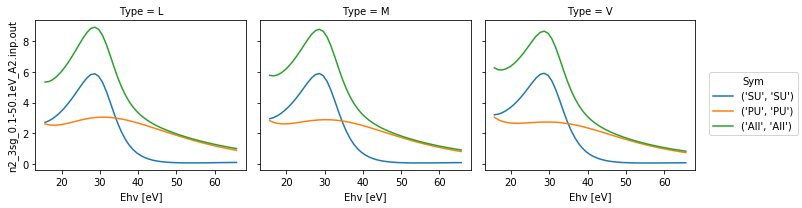

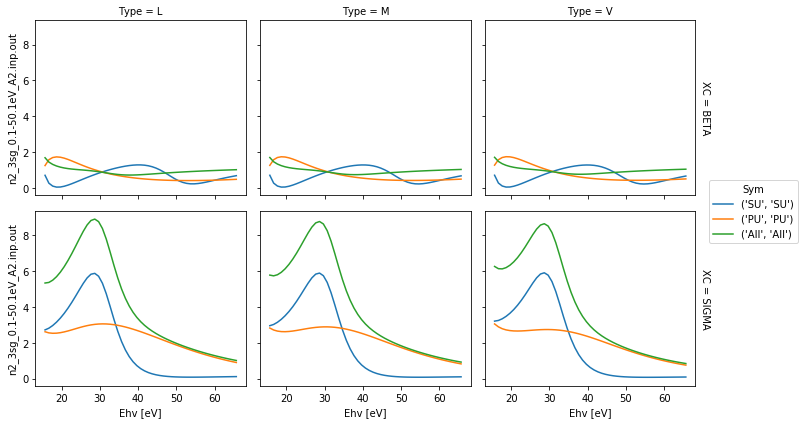

In [9]:
# Plot with faceting on type
daPlot = dataSet[0].sel(XC='SIGMA')
daPlot.plot.line(x='Ehv', col='Type')

# Plot with faceting on type and data
daPlot = dataSet[0]
daPlot.pipe(np.abs).plot.line(x='Ehv', col='Type', row='XC')

# Version info

In [10]:
%load_ext version_information

In [11]:
%version_information epsproc, xarray

Software versions
Python 3.7.4 64bit [GCC 7.3.0]
IPython 7.8.0
OS Linux 5.0.0 31 generic x86_64 with debian buster sid
epsproc 1.1.0 dev
xarray 0.13.0
Mon Oct 14 16:15:32 2019 EDT